- *Name :* *Smruti Sonekar*
- *Branch :* *TY CSE DS*
- *UID :* *2021700064*
- *EXP NO :* *2*
- *Topic :* *Implement Multiple Linear Regression*

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
df1=pd.DataFrame(pd.read_csv("./files/ecommerce.csv"))
df1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**This dataset is having data of customers who buys clothes online. The store offers in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.**

- **Multiple Linear Regression (MLR) is a statistical method used to model the linear relationship between multiple independent variables (explanatory variables) and a single dependent variable (response variable).**
- **Unlike simple linear regression, which involves only one predictor variable, MLR considers two or more predictors simultaneously.**
- **Assumptions for Multiple Linear Regression:**
- *A linear relationship should exist between the Target and predictor variables.*
- *The regression residuals must be normally distributed.*
- *MLR assumes little or no multicollinearity (correlation between the independent variable) in data.*

**For MLR, the dependent or target variable(Y) must be the continuous/real, but the predictor or independent variable may be of continuous or categorical form.Each feature variable must model the linear relationship with the dependent variable.MLR tries to fit a regression line through a multidimensional space of data-points.**

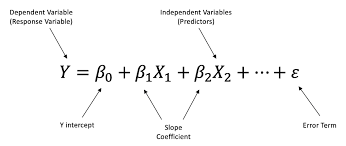

In [3]:
Image(filename='./files/s1.png')


In [4]:
df1["Length of Membership"].isnull().any()

False

In [5]:
df1.drop_duplicates(inplace=True)

In [6]:
d1=df1[["Time on App","Time on Website","Length of Membership","Yearly Amount Spent","Avg. Session Length"]]
d1.head()

,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,Avg. Session Length
0,12.655651,39.577668,4.082621,587.951054,34.497268
1,11.109461,37.268959,2.664034,392.204933,31.926272
2,11.330278,37.110597,4.104543,487.547505,33.000915
3,13.717514,36.721283,3.120179,581.852344,34.305557
4,12.795189,37.536653,4.446308,599.406092,33.330673


In [7]:
x=d1[["Time on App","Time on Website","Length of Membership","Avg. Session Length"]]
y=d1["Yearly Amount Spent"]

In [8]:
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [11]:
x_train.shape,y_train.shape

((400, 4), (400,))

In [12]:
model=LinearRegression()

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
print("\ny=a0+a1x1+a2x2+a3x3+a4x4\n")
print("Intercept (a0)",model.intercept_)
print("\n a1(Time on App) | a2(Time on Website) |a3(Length of Membership) | a4(Avg. Session Length)\n ",model.coef_)



y=a0+a1x1+a2x2+a3x3+a4x4

Intercept (a0) -1044.2574146365557

 a1(Time on App) | a2(Time on Website) |a3(Length of Membership) | a4(Avg. Session Length)
  [38.78534598  0.31038593 61.89682859 25.5962591 ]


*Here the coefficient of Time on App Spent, Length of membership and average session length is high , so the yearly spent amount by customers majorly depends upon Length of membership , time spent with stylists and then time spent on app*

In [15]:
y_pred=model.predict(x_test)

In [16]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 score: {r2}')

Mean Squared Error: 109.86374118394014
R2 score: 0.9778130629184126


In [17]:
print('Train Score: ', model.score(x_train, y_train))  
print('Test Score: ', model.score(x_test, y_test)) 

Train Score:  0.9854240629700333
Test Score:  0.9778130629184126


**The above score tells that our model is 98% accurate with the training dataset and 97% accurate with the test dataset.**

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
x_train.shape

(400, 4)

In [20]:
x_test.shape,y_test.shape

((100, 4), (100,))

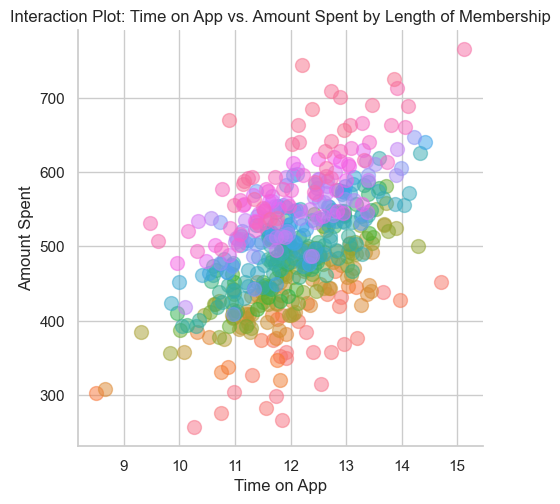

In [21]:
sns.set(style="whitegrid")

# Interaction plot
sns.lmplot(x='Time on App', y='Yearly Amount Spent', hue='Length of Membership',data=df1,scatter_kws={'s': 100, 'alpha': 0.5}, legend=False)

plt.xlabel('Time on App')
plt.ylabel('Amount Spent')
plt.title('Interaction Plot: Time on App vs. Amount Spent by Length of Membership')
plt.show()

**In this interaction plot, we can see that time spent on app and length of memeberships are major reasons for any customers amount spent yearly as all the data points are clustered together which indicates that customers who are using apps are likely to became members and shop**

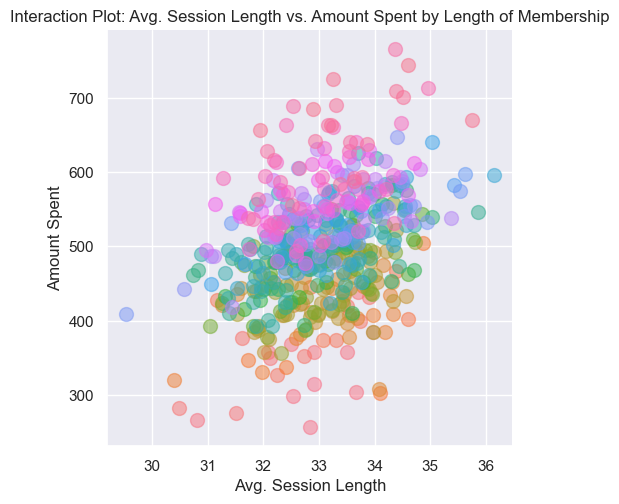

In [22]:
sns.set(style="darkgrid")

# Interaction plot
sns.lmplot(x='Avg. Session Length', y='Yearly Amount Spent', hue='Length of Membership',data=df1,scatter_kws={'s': 100, 'alpha': 0.5}, legend=False)

plt.xlabel('Avg. Session Length')
plt.ylabel('Amount Spent')
plt.title('Interaction Plot: Avg. Session Length vs. Amount Spent by Length of Membership')
plt.show()

**The interaction plot shows that the scatter points for different lengths of membership overlap or cluster together without distinct separation, it suggests that the impact of the average session time with stylists on the yearly amount spent by customers is similar across different lengths of membership. In other words, regardless of how long a customer has been a member, their spending behavior appears to be affected similarly by their average session time with stylists. This interpretation implies that the length of membership does not significantly modify the relationship between average session time and yearly spending, indicating an equal impact across different membership lengths**

In [23]:
x_test

,Time on App,Time on Website,Length of Membership,Avg. Session Length
361,10.347877,39.045156,3.434560,32.077590
73,12.817113,37.031539,3.851579,32.808698
374,10.101632,38.043453,4.238296,31.447446
155,13.457725,37.238806,2.941411,32.449522
104,10.994224,38.074452,3.428860,31.389585
...,...,...,...,...
347,11.304462,37.833972,5.137817,33.769812
86,12.517666,37.151921,2.669942,33.877779
75,12.238057,38.730862,3.120569,32.049839
438,10.047315,37.181447,3.535088,32.149061


In [24]:
y_test


361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156401
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
361,401.033135,402.862301
73,534.777188,542.533257
374,418.602742,426.620119
155,503.978379,501.913864
104,410.069611,409.666655


In [26]:
y_pred.shape

(100,)

In [27]:
y_test.shape

(100,)

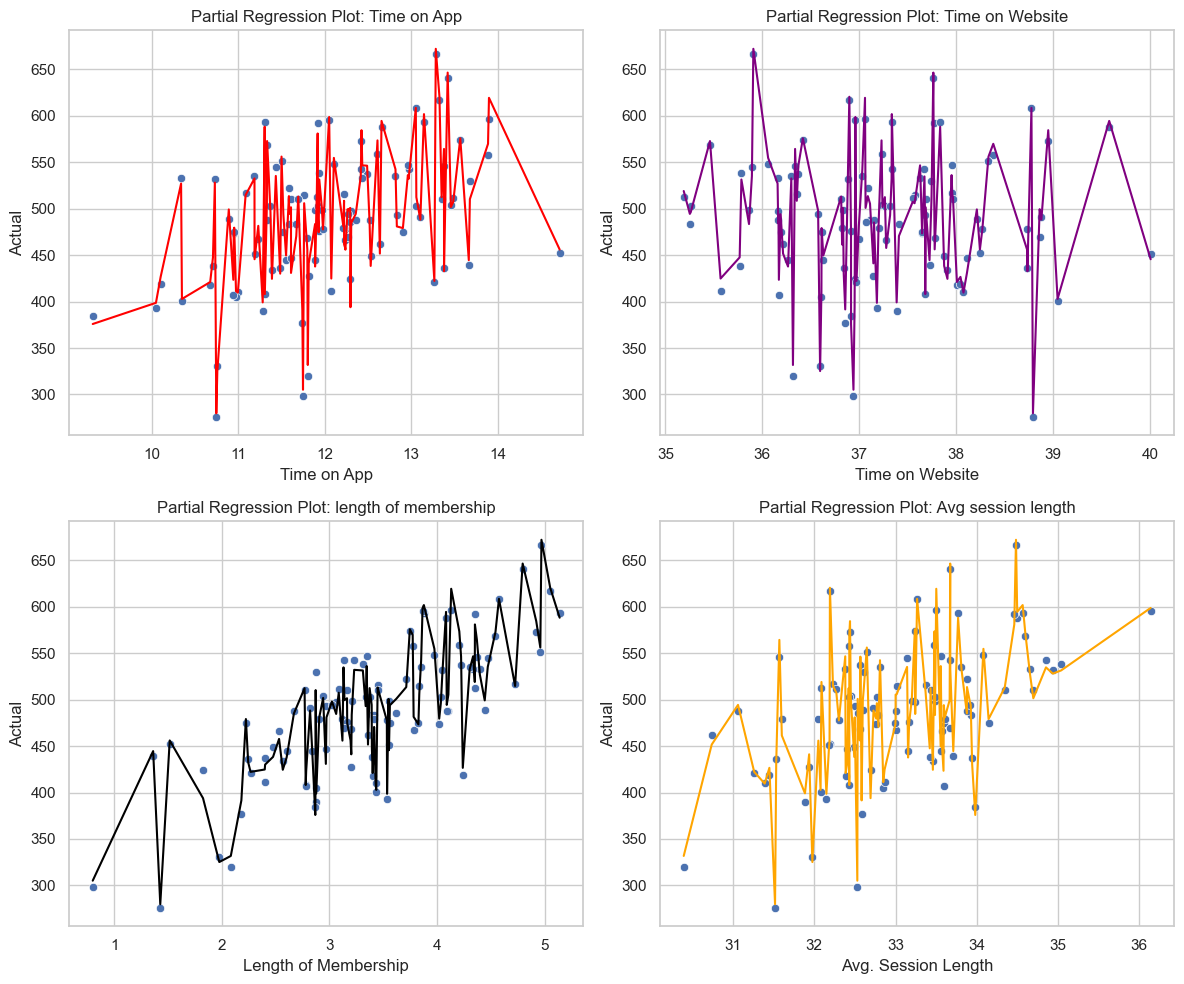

In [28]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
sns.scatterplot(x=df1['Time on App'],y='Actual',data=results,ax=axes[0,0])
sns.lineplot(x=df1['Time on App'],y='Predicted',data=results,color="red",ax=axes[0,0])
axes[0, 0].set_title('Partial Regression Plot: Time on App')

sns.scatterplot(x=df1['Time on Website'],y='Actual',data=results,ax=axes[0,1])
sns.lineplot(x=df1['Time on Website'],y='Predicted',data=results,color="purple",ax=axes[0,1])
axes[0, 1].set_title('Partial Regression Plot: Time on Website')

sns.scatterplot(x=df1['Length of Membership'],y='Actual',data=results,ax=axes[1,0])
sns.lineplot(x=df1['Length of Membership'],y='Predicted',data=results,color="black",ax=axes[1,0])
axes[1,0].set_title('Partial Regression Plot: length of membership')

sns.scatterplot(x=df1['Avg. Session Length'],y='Actual',data=results,ax=axes[1,1])
sns.lineplot(x=df1['Avg. Session Length'],y='Predicted',data=results,color="orange",ax=axes[1,1])
axes[1,1].set_title('Partial Regression Plot: Avg session length')
plt.tight_layout()
plt.show()

**The presented set of graphs comprises partial regression plots, each providing valuable insights into the relationship between a specific independent variable and the amount spent in a multiple linear regression model. The scatterplots in each graph showcase the actual data points, revealing the distribution and patterns of the observed values. Meanwhile, the accompanying lineplots depict the predicted values generated by the regression model, considering the impact of the individual independent variable while keeping other factors constant.**

**Predict the amount spent based on time spent on app, website and average session length**

In [29]:
#let time spent on app= 4 , website= 2 , average session = 1.5
time_on_app = 45 #hrs
time_on_website = 12 #hrs
avg_session_length = 3 #in hrs
length_of_membership = 8 #in yrs
# Use the model to predict
predicted_amount_spent = model.predict([[time_on_app, time_on_website, avg_session_length, length_of_membership]])

print(f"Predicted Amount Spent: ${predicted_amount_spent[0]:.2f}")

Predicted Amount Spent: $1095.27


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Axes: >

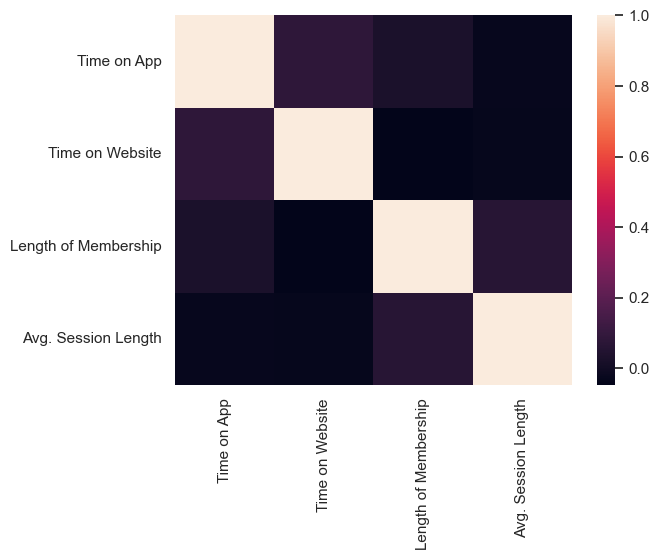

In [30]:
c=x.corr()
sns.heatmap(c)

In [31]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

LASSO (Least Absolute Shrinkage Selector Operator), is quite similar to ridge, but lets understand the difference them by implementing it in our big mart problem.

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Initialize and fit the Lasso regression model
alpha = 0.1  # Regularization strength (lambda)
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train_scaled, y_train)

# Print the coefficients
print("Coefficients:", lasso_model.coef_)

# Make predictions on the testing set
y_pred2 = lasso_model.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse)
r=r2_score(y_test,y_pred2)
print("R2 score:", r)

Coefficients: [38.61332629  0.21897114 63.44701122 25.15155139]
Mean Squared Error: 109.76858705149102
R2 score: 0.9778322792560956


Difference between Lasso and Multiple Linear Regression:

Objective Function:

- Multiple linear regression aims to minimize the residual sum of squares (RSS) only, without any regularization term.
- Lasso regression aims to minimize the RSS along with the sum of the absolute values of the coefficients, penalizing large coefficients and encouraging sparsity.
Feature Selection:

- Multiple linear regression considers all features provided in the dataset.
- Lasso regression performs feature selection by automatically shrinking the coefficients of less important features to zero, effectively eliminating them from the model. This leads to a sparse solution where only the most important features are retained.
Handling Multicollinearity:

- Multiple linear regression may suffer from multicollinearity, where independent variables are highly correlated.
- Lasso regression can handle multicollinearity to some extent by automatically selecting one of the correlated variables and setting the coefficients of others to zero.
Model Interpretability:

- Multiple linear regression provides coefficient estimates for each feature, representing the change in the dependent variable for a one-unit change in the independent variable, holding other variables constant.
- Lasso regression provides coefficient estimates as well, but it also performs feature selection, which can lead to a more interpretable and parsimonious model with fewer features.